# Data Preparation-Taitanic

# Import Library

In [1]:
 import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('gender_submission.csv')

In [4]:
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
df.shape

(418, 2)

In [7]:
df1=pd.read_csv('test.csv')

In [8]:
df2=pd.read_csv('train.csv')

In [9]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df1.shape

(418, 11)

In [12]:
df2.shape

(891, 12)

In [13]:
df2.corr()['Survived'].sort_values()

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

# EDA

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

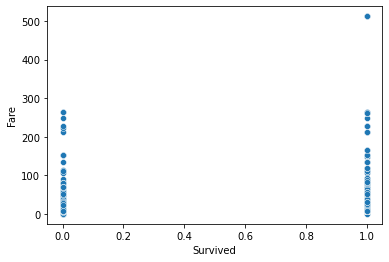

In [14]:
sns.scatterplot(data=df2,x='Survived',y='Fare')

In [15]:
df2[(df2['Fare']>400)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [16]:
index_drop=df2[(df2['Fare']>400)].index
df2=df2.drop(index_drop,axis=0)

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

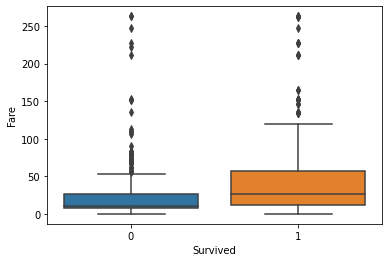

In [17]:
sns.boxplot(data=df2,x='Survived',y='Fare')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

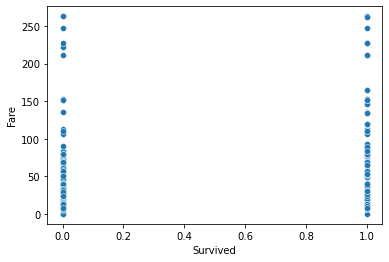

In [18]:
sns.scatterplot(data=df2,x='Survived',y='Fare')

<AxesSubplot:xlabel='Survived', ylabel='Parch'>

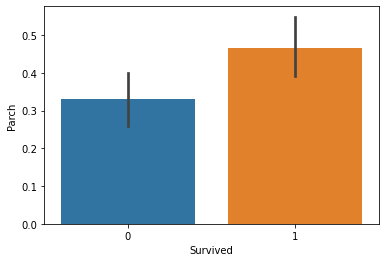

In [19]:
sns.barplot(data=df2,x='Survived',y='Parch')

# Clean Data

In [20]:
df2.isnull().sum()/len(df2)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.932432
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.252252
Embarked        0.225225
dtype: float64

In [21]:
def missing_data(df2):
    nan_percentag=df2.isnull().sum()/len(df2)*100
    nan_percentag=nan_percentag[nan_percentag>0].sort_values()
    return nan_percentag

In [22]:
nan_percentag=missing_data(df2)

In [23]:
nan_percentag

Embarked     0.225225
Age         19.932432
Cabin       77.252252
dtype: float64

<AxesSubplot:>

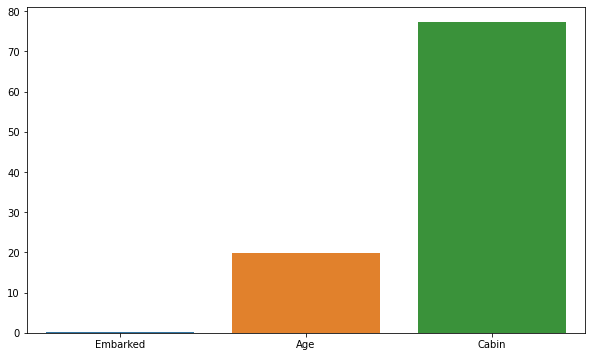

In [24]:
nan_percentag=missing_data(df2)
plt.figure(figsize=(10,6))
sns.barplot(x=nan_percentag.index,y=nan_percentag)

In [25]:
df2[df2['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
df2=df2.dropna(axis=0,how='any',subset=['Embarked'])

<AxesSubplot:>

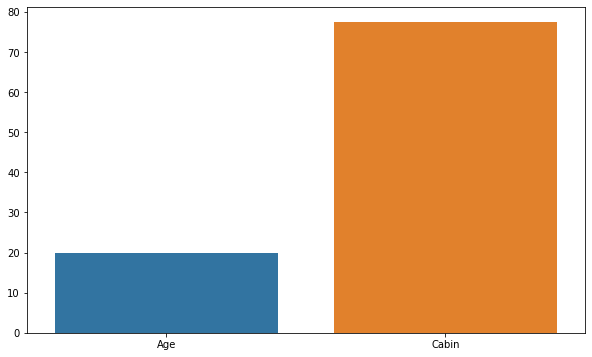

In [27]:
nan_percentag=missing_data(df2)
plt.figure(figsize=(10,6))
sns.barplot(x=nan_percentag.index,y=nan_percentag)

In [28]:
df2=df2.drop(['Cabin'],axis=1)

<AxesSubplot:>

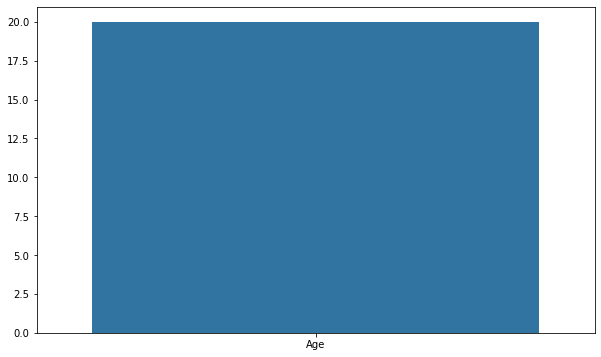

In [29]:
nan_percentag=missing_data(df2)
plt.figure(figsize=(10,6))
sns.barplot(x=nan_percentag.index,y=nan_percentag)

In [30]:
df2['Age'].fillna(df2['Age'].mean(),inplace=True)

In [31]:
nan_percentag

Age    19.977427
dtype: float64

In [32]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
df2.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)

In [34]:
df2['Sex']=df2['Sex'].replace({'male':0,'female':1})

In [35]:
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [36]:
df2.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

# Determine the Features & Target Variable


In [37]:
x=df2.drop(['Survived'],axis=1)
y=df2['Survived']

# Split the Dataset to Tain & Test set

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=101)

# scaling the Featuer

In [39]:
from sklearn.preprocessing import StandardScaler
standard_model=StandardScaler()
standard_model.fit(x_train)

StandardScaler()

In [40]:
scaler_x_train=standard_model.transform(x_train)
scaler_x_test=standard_model.transform(x_test)

# Train the model

In [41]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(scaler_x_train,y_train)

LogisticRegression()

In [42]:
log_model.coef_

array([[-0.91571734,  1.33504392, -0.45500851, -0.43096045, -0.06165733,
         0.03372627]])

# Predocting Test Data

In [43]:
y_pred=log_model.predict(scaler_x_test)

# Evaluating the Model

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [45]:
accuracy_score(y_test,y_pred)

0.7640449438202247

In [46]:
confusion_matrix(y_test,y_pred)

array([[49,  8],
       [13, 19]], dtype=int64)

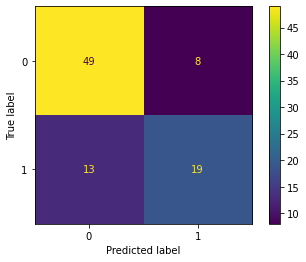

In [47]:
plot_confusion_matrix(log_model,scaler_x_test,y_test)

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82        57
           1       0.70      0.59      0.64        32

    accuracy                           0.76        89
   macro avg       0.75      0.73      0.73        89
weighted avg       0.76      0.76      0.76        89



# Evaluating Curves and AUC

In [49]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

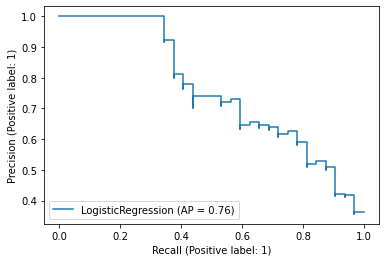

In [50]:
plot_precision_recall_curve(log_model,scaler_x_test,y_test)

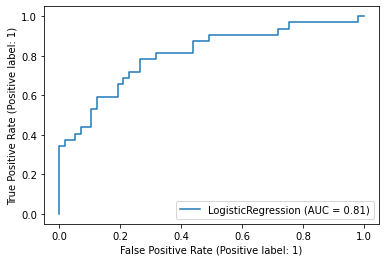

In [51]:
plot_roc_curve(log_model,scaler_x_test,y_test)

# KNN_Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=2)
knn_model.fit(scaler_x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

# predicting Test data

In [53]:
y_pred_knn=knn_model.predict(scaler_x_test)

# Evaluating the model

In [54]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [55]:
confusion_matrix(y_pred_knn,y_test)

array([[55, 12],
       [ 2, 20]], dtype=int64)

In [56]:
accuracy_score(y_pred_knn,y_test)

0.8426966292134831

In [57]:
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        67
           1       0.62      0.91      0.74        22

    accuracy                           0.84        89
   macro avg       0.79      0.86      0.81        89
weighted avg       0.88      0.84      0.85        89



# Elbow for choosing Reasonable K VALUE

In [58]:
test_error_rate=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaler_x_train,y_train)
    y_pred_test=knn_model.predict(scaler_x_test)
    test_error=1-accuracy_score(y_test,y_pred_test)
    test_error_rate.append(test_error)
    

In [59]:
test_error_rate

[0.2584269662921348,
 0.1573033707865169,
 0.1797752808988764,
 0.1910112359550562,
 0.2134831460674157,
 0.2134831460674157,
 0.2134831460674157,
 0.2359550561797753,
 0.2134831460674157,
 0.202247191011236,
 0.202247191011236,
 0.202247191011236,
 0.202247191011236,
 0.2247191011235955,
 0.2134831460674157,
 0.2247191011235955,
 0.2134831460674157,
 0.2134831460674157,
 0.202247191011236,
 0.202247191011236,
 0.2134831460674157,
 0.2247191011235955,
 0.2134831460674157,
 0.2471910112359551,
 0.202247191011236,
 0.2134831460674157,
 0.1910112359550562,
 0.2134831460674157,
 0.202247191011236]

Text(0.5, 0, 'k _value')

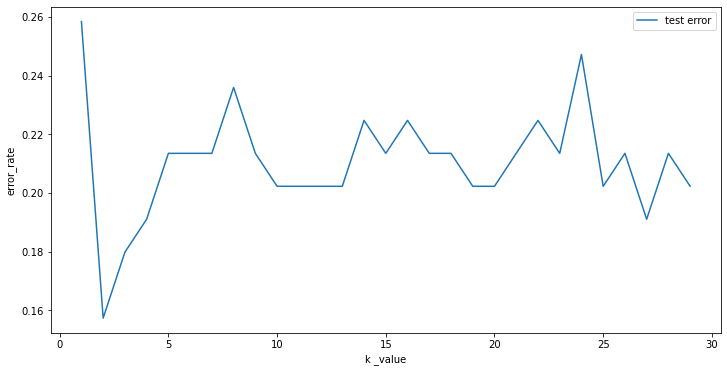

In [60]:
plt.figure(figsize=(12,6))
plt.plot(range(1,30),test_error_rate,label='test error')
plt.legend()
plt.ylabel('error_rate')
plt.xlabel('k _value')

# Creating the Pipeline to find K values

In [61]:
scaler=StandardScaler()
knn=KNeighborsClassifier()

In [62]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [63]:
operation=[('scaler',scaler),('knn',knn)]

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
pipe=Pipeline(operation)

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
k_values=range(1,30)

In [68]:
param_gride={'knn__n_neighbors':k_values}

In [69]:
full_cv_classifier=GridSearchCV(pipe,param_gride,cv=5,scoring='accuracy')

In [70]:
full_cv_classifier.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': range(1, 30)}, scoring='accuracy')

In [71]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=6))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=6),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 6,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [72]:
full_cv_classifier.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

# Final Model

In [83]:
knn6=KNeighborsClassifier(n_neighbors=6)
knn6.fit(scaler_x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [84]:
y_pred_6=knn6.predict(scaler_x_test)

In [86]:
print(classification_report(y_pred_6,y_test))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        66
           1       0.56      0.78      0.65        23

    accuracy                           0.79        89
   macro avg       0.74      0.79      0.75        89
weighted avg       0.82      0.79      0.80        89



In [88]:
confusion_matrix(y_pred_6,y_test)

array([[52, 14],
       [ 5, 18]], dtype=int64)

In [89]:
sample=x_test.iloc[35]

In [90]:
sample

Pclass     2.0
Sex        0.0
Age       18.0
SibSp      0.0
Parch      0.0
Fare      13.0
Name: 228, dtype: float64

In [91]:
sample.values

array([ 2.,  0., 18.,  0.,  0., 13.])

In [93]:
sample.values.reshape(1,-1)

array([[ 2.,  0., 18.,  0.,  0., 13.]])

In [94]:
knn6.predict(sample.values.reshape(1,-1))

array([1], dtype=int64)

In [96]:
knn6.predict_proba(sample.values.reshape(1,-1))

array([[0.33333333, 0.66666667]])

# SVM Model

In [97]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)

SVC()

# predicting the data test

In [98]:
y_pred_svm=svm_model.predict(x_test)

# Evaluating the model

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [100]:
accuracy_score(y_pred_svm,y_test)

0.6741573033707865

In [101]:
confusion_matrix(y_pred_svm,y_test)

array([[52, 24],
       [ 5,  8]], dtype=int64)

In [102]:
print (classification_report(y_pred_svm,y_test))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78        76
           1       0.25      0.62      0.36        13

    accuracy                           0.67        89
   macro avg       0.58      0.65      0.57        89
weighted avg       0.82      0.67      0.72        89



# choosing the best hyperparameters through GridsearchCV

In [103]:
from sklearn.model_selection import GridSearchCV

In [104]:
svm=SVC()
param_grid={'C':[0.01,0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001],'kernel':['rbf','linear']}
grid=GridSearchCV(svm,param_grid,cv=5)


In [ ]:
grid.fit(x_train,y_train)


In [ ]:
grid.best_estimator_

In [ ]:
grid.best_params_

In [ ]:
y_pred_grid=grid.predict(x_test)

In [ ]:
confusion_matrix(y_pred_grid,y_test)

In [ ]:
print(classification_report(y_pred_grid,y_test))